In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

K Means on a randomly generated dataset

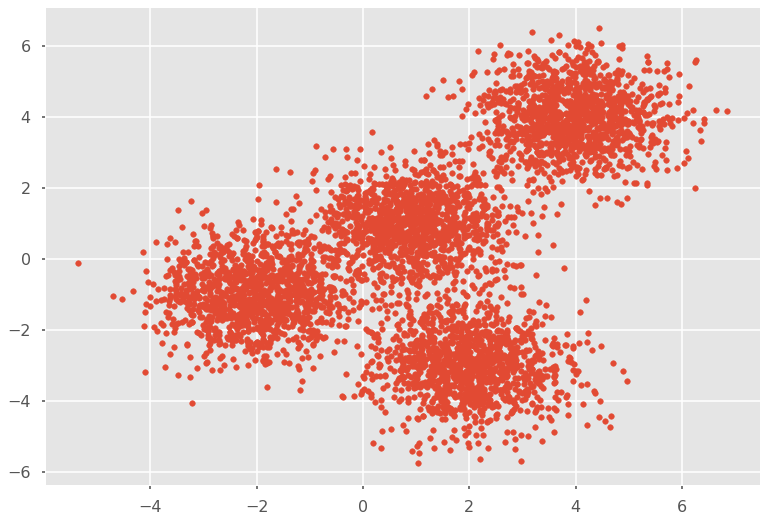

In [18]:
np.random.seed(0)
x, y = make_blobs(n_samples=5000, centers = [[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.style.use(['ggplot'])
plt.scatter(x[:, 0], x[:, 1], marker = '.')

#### Setting up K-Means Clustering

- init : initialization method of the centroids
    
    - k-means++ :  selects initial cluster centers for k-means clustering in a smart way to speed up convergence 
    
- n_clusters : the number of clusters to form as well as the number of centroids to generate

    - 4 in this case
    
- n_init : Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

    - 12 in this case
    
- output parameter will be called kMeans

In [27]:
kMeans = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)
# fitting the k means with the above feature matrix x
kMeans.fit(x)
# grabbing the labels for each point in the model using KMeans'.labels_ attribute 
kMeansLabels = kMeans.labels_
# getting the coordinates to the cluster centers
kMeansClusterCenters = kMeans.cluster_centers_
kMeansClusterCenters

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

#### Creating the visual plot

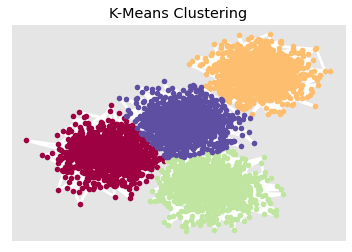

In [28]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which produces an array of colors based on the number of labels there are
# kMeansLabels gives the unique labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kMeansLabels))))

# Creating the plot
ax = fig.add_subplot(1, 1, 1)

# Loop plots the data points and centroids
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    # Create a list of all data points where the data points that are in the cluster are labeled trye else they are labeled false
    members = (kMeansLabels == k)
    clusterCenter = kMeansClusterCenters[k]
    
    ax.plot(x[members, 0], x[members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(clusterCenter[0], clusterCenter[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)
    
ax.set_title('K-Means Clustering')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

#### K-Means Clustering on customer segmentation data

In [33]:
import pandas as pd

customerdf = pd.read_csv('Cust_Segmentation.csv')
customerdf.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [34]:
# Dropping column with categorixal data
df = customerdf.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally.

In [35]:
from sklearn.preprocessing import StandardScaler

x = df.values[:, 1:]
x = np.nan_to_num(x)
clusterData = StandardScaler().fit_transform(x)
clusterData

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [36]:
clusterNum = 3
kMeans = KMeans(init = 'k-means++', n_clusters=clusterNum, n_init = 12)
kMeans.fit(x)
labels = kMeans.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [37]:
# Assign label to each row in data frame
df['Clus_km'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [38]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


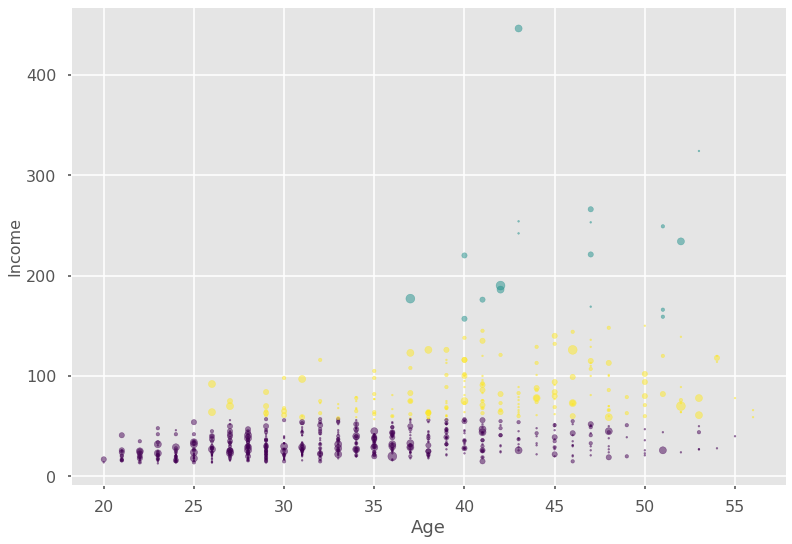

In [40]:
# Looking at the distribution of the data set of customers based on their age and income
area = np.pi * (x[:, 1]) ** 2
plt.style.use('ggplot')
plt.scatter(x[:, 0], x[:, 3], s = area, c = labels.astype(np.float), alpha = 0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

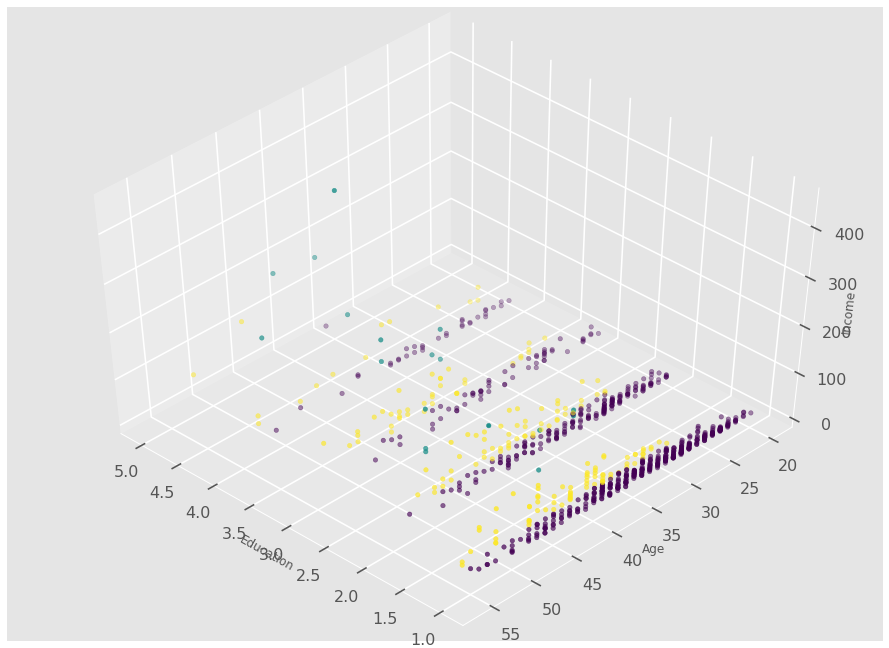

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt.style.use('ggplot')
plt.clf()
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c = labels.astype(np.float))

The above three clusters can be 

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDEL AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME